## Binary classication problem: Predicting Customer churn

In this exercise we're attemting to predict the churn rate of customers. To do this, we will use the customer churn dataset. 

### Import libraries 

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.metrics import cohen_kappa_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics


from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

### 1. Load the dataset and explore the variables.


Our data source for predicting customer churn is in a customer dataset. To start our analysis we have load the data from the csv file

In [2]:
churnData = pd.read_csv('customer_churn.csv',sep=",")
churnData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Exploring our data

First, we need to see how balanced or imbalanced our data are. Below, we can see that the target variable 'Churn' is quite imbalanced with over 70% of 'No's. 

In [3]:
## Count instances of the target variable 
#count frequency of each value in 'Churn' column
counts = churnData['Churn'].value_counts()
##count frequency of each value in 'Churn' column as percentage of total 
pct = churnData['Churn'].value_counts(normalize=True)

#concatenate results into one DataFrame
pd.concat([counts,pct], axis=1, keys=['n', '%'])

,n,%
No,5174,0.73463
Yes,1869,0.26537


In this case, we have isolated 3 variables: 
- SeniorCitizen - 0 = false, 1 = true
- Tenure - 0 - 70 (time period but don't know which)
- MonthlyCharges - 19 - 119 xcurrency

We can plot the numericals to get a sense of their frequencies and distributions. 

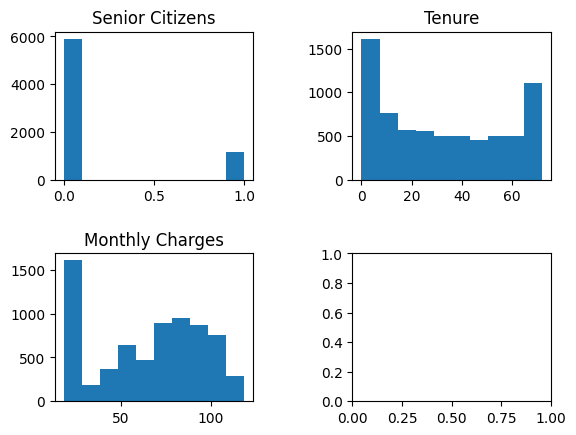

In [43]:
# multiple plots in the same space

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=.5) # ensure that the plots do not overlap

axs[0, 0].hist(churnData['SeniorCitizen'])
axs[0, 0].set_title('Senior Citizens')
axs[0, 1].hist(churnData['tenure'])
axs[0, 1].set_title('Tenure')
axs[1, 0].hist(churnData['MonthlyCharges'])
axs[1, 0].set_title('Monthly Charges')


plt.show()

## Data preparation

### 3. Extract the target variable


We need to put the target variable, in this case, a categorical data type with two possible results:
- Yes
- No 
Yes = Left / churn
No = Didn't leave / no churn

We'll make this vector 'y'

In [44]:
y = churnData["Churn"] # create a data frame with only the 'yes' and 'no' from the 'Churn' column, the target variable aka the phenomenon that we wish to predict 
y # show the target vector 

### 4a. Create a dataframe with only the independent variables


Now we need to isolate the three numerical variables into a new dataframe 'numericals'.

In [45]:
numericals = churnData.select_dtypes(include="number")
numericals.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


### 4b. Scale the independent variables


Before applying our machine learning model, we need to scale the numerical variables. This means that we'll use the standard scaler to remove the mean and unit variance.

In [47]:
transformer = StandardScaler().fit(numericals)
standard_x = transformer.transform(numericals)
X = pd.DataFrame(standard_x)
X.columns = numericals.columns # put the column headers back
X.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365


### 5. Build the logistic regression model.


Now we have to train the model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [49]:
len(X_test)

2113

In [51]:
classing = LogisticRegression(random_state=0, multi_class = 'ovr').fit(X_train, y_train)
predictions = classing.predict(X_test)

We can use a confusion matrix to assess the accuracy the classification

In [60]:
confusion_matrix(y_test,predictions)

array([[1420,  119],
       [ 317,  257]])

Or show the matrix as a plot

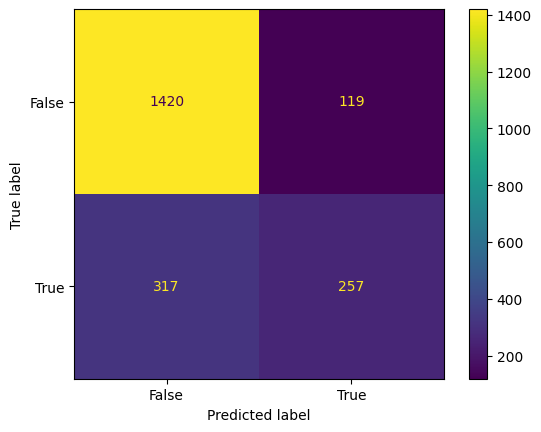

In [66]:

confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

<blockquote style="background-color: #FEECEF; color: #155724; border-color: #FFA0FD; padding: 10px; border-radius: 5px;">
    
**Interpreting the confusion matrix:**
    
_____________

From the above confusion matrix, we can see that we were able to predict:

- **1420 True Negatives (Top-Left Quadrant)**
- 119 False Positives (Top-Right Quadrant)
- 317 False Negatives (Bottom-Left Quadrant)
- 237 True Positives (Bottom-Right Quadrant)

This suggests that our model as some degree of accuracy. However, we still have **20%** of our predictions that are false. 
    
_____________
</blockquote>

### 6. Evaluate the model

Now we use sklearn 'score' method that gives us the R2 compare the regression line to the mean

In [50]:
classing.score(X_test,y_test)

0.7936583057264552

We can also use the accuracy score function from the sklearn package  to calculate the accuracy of the predicted labels against the true labels.

In [69]:
Accuracy = metrics.accuracy_score(y_test, predictions) # same as the classing score 
Accuracy

0.7936583057264552

And we get the same result

<blockquote style="background-color: #FEECEF; color: #155724; border-color: #FFA0FD; padding: 10px; border-radius: 5px;">

We can also check our f1 score (recall and precision) which in this case is .87 for No but only .54 for Yes. 

This makes sense as we have far fewer 'yes's in our dataset. 

- No	5174	0.73463
- Yes	1869	0.26537

</blockquote>

In [73]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



Even a simple model will give us more than 70% accuracy. Why?


Perhaps because the differences between the two classes in the target variable are very distinct.

### Testing a less imbalanced version of the data

As we are not satisfied with how well we predicted the under-represented data 'yes's, we can manually reduce the 'yes' instances to 500 to see if this improves our accuracy. 

In [84]:
yes = churnData[churnData['Churn']=='Yes']
no = churnData[churnData['Churn']=='No']
yes = yes.sample(500)

In [78]:
no # show the no dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [79]:
yes # show the yes dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5345,9526-JAWYF,Male,0,No,No,26,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,89.80,2335.3,Yes
1849,0621-TWIEM,Male,0,No,No,10,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.55,402.6,Yes
3525,5889-JTMUL,Female,1,Yes,No,50,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,95.05,4888.7,Yes
5683,5057-LCOUI,Female,0,No,No,39,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.75,2011.4,Yes
408,4800-VHZKI,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.90,19.9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4448,6543-XRMYR,Female,1,No,No,30,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.70,2967.35,Yes
5179,9048-JVYVF,Male,0,No,No,3,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,191.35,Yes
2673,8429-XIBUM,Male,0,No,No,22,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.35,2317.1,Yes
1751,9436-ZBZCT,Male,0,No,No,14,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.95,1178.4,Yes


Which gives us a 91-9% ratio of no to yes

In [85]:
## Count instances of the target variable 
#count frequency of each value in 'Churn' column
counts = data['Churn'].value_counts()
##count frequency of each value in 'Churn' column as percentage of total 
pct = data['Churn'].value_counts(normalize=True)

#concatenate results into one DataFrame
pd.concat([counts,pct], axis=1, keys=['n', '%'])

,n,%
No,5174,0.911879
Yes,500,0.088121


In [86]:
#shuffling the data
data = data.sample(frac=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4659,6616-AALSR,Female,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),104.30,6725.3,No
5796,8571-ZCMCX,Female,0,Yes,Yes,47,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),60.00,2768.65,No
5028,0254-FNMCI,Female,0,No,No,72,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,109.90,7624.2,No
5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
1716,5515-RUGKN,Male,0,No,No,8,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),54.75,438.05,No


We then repeat the above steps and this gives us a R2 score of .9

In [87]:
numericData = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(data[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(data[['tenure','SeniorCitizen','MonthlyCharges']])

y = pd.DataFrame(data=data, columns=['Churn'])


X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.913681738109219

<blockquote style="background-color: #FEECEF; color: #155724; border-color: #FFA0FD; padding: 10px; border-radius: 5px;">

🚩 However for the 'yes' class, it only gives us 0.00 precision! 

</blockquote>

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.91      1.00      0.95      1558
         Yes       0.00      0.00      0.00       145

    accuracy                           0.91      1703
   macro avg       0.46      0.50      0.48      1703
weighted avg       0.84      0.91      0.87      1703



### Manual upsampling

Down sampling didn't work. It made predicting no more accurate but yes with even less accuracy. Now we can upsample the minority class by repeating samples from the minority class to create a more balanced dataset. 

In [89]:
## Count instances of the target variable 
#count frequency of each value in 'Churn' column
counts = churnData['Churn'].value_counts()
##count frequency of each value in 'Churn' column as percentage of total 
pct = churnData['Churn'].value_counts(normalize=True)

#concatenate results into one DataFrame
pd.concat([counts,pct], axis=1, keys=['n', '%'])

,n,%
No,5174,0.73463
Yes,1869,0.26537


As we can see, we have the original 73-26 balance of yes and no

In [1]:
yes = churnData[churnData['Churn']=='Yes'].sample(counts[0], replace=True)
no = churnData[churnData['Churn']=='No']
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

NameError: name 'churnData' is not defined

Using the `frac` function we've created a perfectly balanced dataset. We can now re-run the logistic regresssion and test for accuracy and precision. 

In [91]:
numericData = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(data[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(data[['tenure','SeniorCitizen','MonthlyCharges']])

y = pd.DataFrame(data=data, columns=['Churn'])


X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7297906602254428

If we run the classification report, we get equally precise (or imprecise) results. 

In [92]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.73      0.73      0.73      1551
         Yes       0.73      0.73      0.73      1554

    accuracy                           0.73      3105
   macro avg       0.73      0.73      0.73      3105
weighted avg       0.73      0.73      0.73      3105



### Upsampling and downsampling with the `imblearn` library

In [ ]:
#!pip install imblearn

In [94]:
from imblearn.under_sampling import RandomUnderSampler #import functions from imblearn
from imblearn.over_sampling import RandomOverSampler

### Downsampling

In [95]:
rus = RandomUnderSampler()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_rus, y_rus = rus.fit_resample(X, y)

In [96]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [97]:
y_rus.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [98]:
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)


X_train, X_test, y_train, y_test = train_test_split(X, y_rus, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7335115864527629

Even with less data the results are very to those done with manual upsampling.

### Upsampling

We can use a random upsampling method. 

In [99]:
ros = RandomOverSampler()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_ros, y_ros = ros.fit_resample(X, y)

In [100]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [101]:
y_ros.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [102]:
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)

X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.736231884057971

More records to train the model but also similar results.

### Synthetic Minority Oversampling TEchnique (SMOTE)

**SMOTE** create as many fake samples from the minority class as needed in order to balance the classes. 

The SMOTE algorithm can be broken down into foll. steps:
Randomly pick a point from the minority class.
Compute the k-nearest neighbors (for some pre-specified k) for this point.
Add k new points somewhere between the chosen point and each of its neighbors.

In [103]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7484702093397746

No such a big improvement...can you guess why?

### UnderSampling using TomekLinks 

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [119]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts(normalize=True)

No     0.715222
Yes    0.284778
Name: Churn, dtype: float64

It does not make the two classes equal but only removes the points from the majority 
class that are close to other points in minority class. The relative % difference between the two classes has changed by only 2 points, and precision for 'yes' has decreased by 1 point but the f1 score has increased by 6 points. 

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7973590655154901

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1413
         Yes       0.67      0.54      0.60       556

    accuracy                           0.80      1969
   macro avg       0.75      0.72      0.73      1969
weighted avg       0.79      0.80      0.79      1969



<blockquote style="background-color: #FEECEF; color: #155724; border-color: #FFA0FD; padding: 10px; border-radius: 5px;">

**Conclusions:**
    
_____________

Despite several attempts to improve the precision and accuracy:
- It was difficult to get above 80% 
- Under or over sampling skewed the f1 score for either of the one classes 

**Next steps:**
_____________
Experiment with adjusting  the class weights: 
-Set higher weights for the minority class and lower weights for the majority class. I found this one to experiment with: 

`from sklearn.linear_model import LogisticRegression`

`# Instantiate the Logistic Regression model with class weights`

`lr = LogisticRegression(class_weight='balanced')`

`# Fit the model to your imbalanced dataset`

`lr.fit(X_train, y_train)`

`# Predict on your test set`

`y_pred = lr.predict(X_test)`

</blockquote>